# Clustering of tones using cmn data(all)

keep in mind: numeric vectors need to be downsampled before clustering; SAX can be converted from the original variable length vectors directly.

## Numeric F0 vectors (log, downsample)

In [110]:
cd ts_mining/

/Users/zangsir/Desktop/speech-exp-diuss/ts_mining


In [2]:
from ts_clust_modules import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
cd ..

/Users/zangsir/Desktop/speech-exp-diuss/ts_mining


In [135]:
fileName='../downsample_syl_noneut.csv'
data = np.genfromtxt(fileName, delimiter=',')

In [136]:
data[0]

array([ 0.547,  0.54 ,  0.525,  0.494,  0.473,  0.462,  0.456,  0.452,
        0.452,  0.455,  0.463,  0.472,  0.479,  0.481,  0.479,  0.477,
        0.476,  0.475,  0.476,  0.475,  0.473,  0.47 ,  0.466,  0.464,
        0.463,  0.461,  0.457,  0.45 ,  0.384,  0.378,  4.   ])

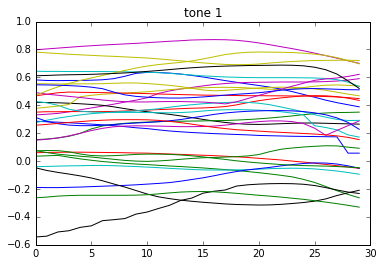

In [137]:
import random
data_rand=random.sample(data,100)
for line in data_rand:
    if line[-1]==1:
        plt.plot(line[:-1])
        plt.title('tone 1')

In [ ]:
#supply a list of list of tone ground truth, in clusters

In [53]:

#use some test data to slice out the last col which is the label
import random
data_rand=random.sample(data,100)
test_data=np.delete(data_rand,-1,axis=1)
centroids,assignments,costLog=k_means_clust_euclid(test_data,5,10)
data_rand_np=np.array(data_rand)
labels=data_rand_np[:, -1,None]

In [54]:
np.log(data_rand)

array([[ 4.61294985,  4.6126819 ,  4.61057555, ...,  3.00186344,
         2.1278745 ,  1.38629436],
       [ 1.24040116,         nan,         nan, ...,         nan,
                nan,  0.69314718],
       [        nan,         nan,         nan, ...,         nan,
                nan,  0.        ],
       ..., 
       [ 2.71747234,  2.78055689,  2.82612949, ...,         nan,
                nan,  0.69314718],
       [ 4.03261099,  4.00974845,  3.98005542, ...,  4.12624689,
         3.55027809,  0.69314718],
       [        nan,         nan,         nan, ...,         nan,
                nan,  1.09861229]])

In [55]:
data_rand

[array([ 100.781,  100.754,  100.542,  100.143,   99.531,   98.661,
          97.476,   95.93 ,   94.016,   91.777,   89.317,   86.817,
          84.365,   81.843,   79.072,   76.053,   72.908,   69.684,
          66.508,   63.52 ,   60.766,   58.233,   55.81 ,   53.241,
          50.25 ,   46.901,   43.187,   39.272,   20.123,    8.397,    4.   ]),
 array([  3.457,  -9.719, -15.892, -18.445, -19.61 , -20.297, -21.042,
        -21.358, -20.483, -19.528, -18.794, -17.535, -16.507, -15.218,
        -13.52 , -11.784, -10.524,  -9.848,  -9.411,  -9.038,  -8.799,
         -8.884,  -9.552, -10.978, -12.228, -12.72 , -12.02 ,  -5.784,
         -7.031, -14.952,   2.   ]),
 array([-34.108, -33.909, -33.76 , -33.598, -33.327, -32.529, -32.294,
        -31.937, -31.305, -30.895, -29.852, -29.481, -28.213, -27.033,
        -26.314, -25.743, -23.919, -23.017, -22.467, -22.03 , -21.474,
        -19.817, -19.104, -18.812, -18.673, -18.636, -18.693, -17.741,
        -16.788, -15.836,   1.   ]),
 array

# compute accuracy

In [48]:

tone_assign=[]
total_correct=0
record=[]
for k in assignments:
    #print k
    tonex=[]
    a,b,c,d,e=0,0,0,0,0

    for idx in assignments[k]:
        print idx
        if labels[idx][0]==1:
            #print 'case 1'
            tonex.append(1)
            a+=1
        elif labels[idx][0]==2:
            #print 'case 2'
            tonex.append(2)
            b+=1
        elif labels[idx][0]==3:
            #print 'case 3'
            tonex.append(3)
            c+=1
        elif labels[idx][0]==4:
            #print 'case 4'
            tonex.append(4)
            d+=1
        else:
            #print 'case 0'
            tonex.append(0)
            e+=1
    tone_assign.append(tonex)
    l=[a,b,c,d,e]
    #majority is the tone label with the majority class in this cluster
    majority=l.index(max(l))+1

    if not majority in record:
        record.append(majority)
        num_majority=max(l)
        total_correct=total_correct+num_majority
    else:
        print "duplicated majority class, accuracy too low!!! Exiting..."
        break
if len(record)==5:
    accuracy=total_correct/len(labels)
    #print "total correct:",total_correct
    #print "accureacy:",accuracy
    return accuracy
else:
    #print "no accuracy to be computed"
    return 0    



72
case 4
130
case 0
167
case 1
168
case 4
188
case 1
197
case 4
200
case 4
253
case 0
260
case 4
315
case 1
331
case 1
340
case 1
403
case 4
427
case 4
443
case 1
485
case 1
549
case 4
611
case 3
704
case 4
744
case 1
754
case 1
793
case 1
833
case 1
940
case 4
945
case 3
999
case 1
11
case 2
22
case 4
23
case 4
30
case 4
32
case 2
34
case 1
35
case 4
36
case 1
42
case 3
47
case 4
49
case 2
52
case 4
62
case 1
64
case 4
70
case 4
71
case 1
74
case 4
77
case 1
88
case 2
89
case 2
90
case 4
93
case 1
97
case 1
100
case 2
102
case 4
111
case 4
115
case 1
116
case 3
117
case 2
128
case 2
135
case 4
138
case 1
141
case 4
142
case 1
146
case 1
147
case 4
148
case 4
150
case 2
155
case 1
171
case 4
183
case 3
187
case 1
191
case 1
192
case 4
208
case 3
209
case 1
211
case 3
218
case 4
222
case 2
224
case 2
225
case 4
226
case 2
233
case 1
234
case 3
238
case 4
239
case 2
243
case 4
245
case 0
249
case 4
252
case 4
254
case 4
258
case 1
259
case 4
264
case 2
266
case 1
267
case 4
269
case 4
2

In [42]:
test_data[35]

array([ 33.944,  33.98 ,  34.016,  34.052,  34.087,  34.123,  34.159,
        34.195,  34.231,  34.267,  34.303,  34.339,  34.375,  34.411,
        34.447,  34.482,  34.518,  34.554,  34.59 ,  34.626,  34.662,
        34.698,  34.734,  34.77 ,  34.806,  34.841,  34.877,  34.913,
        34.949,  34.985])

In [45]:
len(test_data)

1000

In [51]:
data_rand[905]

array([ 93.621,  92.666,  91.484,  90.154,  88.749,  87.317,  85.858,
        84.295,  82.378,  79.012,  67.588,  64.126,  62.171,  60.372,
        58.298,  54.999,  47.167,  43.247,  40.476,  38.864,  38.069,
        37.817,  37.963,  38.386,  38.89 ,  39.178,  38.993,  38.154,
        36.338,  33.272,   4.   ])

In [64]:
def get_annosq(phons_file):
    g=open(phons_file,'r').read().split('\n')
    timestamps=[]
    for line in g:
        l=line.split()
        if line!='' and not line.startswith('begin'):
            timestamps.append(l)
    xt=[]
    labels=[]
    for l in timestamps:
        xt.append(l[1])
        labels.append(l[2])
    return timestamps,xt,labels

In [65]:
from plot_spectro import *
phons_file='all_data/CHJ000010.qphons'
timestamps,xt,labels=get_annosq(phons_file)

In [66]:
timestamps

[['0', '0.0625', 'sil', 'na'],
 ['0.0625', '0.1225', 'g', 'na'],
 ['0.1225', '0.2525', 'ei3', '0.892'],
 ['0.2525', '0.3125', 'm', 'na'],
 ['0.3125', '0.4525', 'ei3', '0.6'],
 ['0.4525', '0.5025', 'g', 'na'],
 ['0.5025', '0.6125', 'uo2', '0.964'],
 ['0.6125', '0.6725', 'r', 'na'],
 ['0.6725', '0.8325', 'en2', '0.814'],
 ['0.8325', '0.9425', 'ch', 'na'],
 ['0.9425', '1.0925', 'uang4', '0.311'],
 ['1.0925', '1.1525', 'z', 'na'],
 ['1.1525', '1.2425', 'ao4', '0.667'],
 ['1.2425', '1.2825', 'l', 'na'],
 ['1.2825', '1.3525', 'e0', '0.366'],
 ['1.3525', '1.4125', 'd', 'na'],
 ['1.4125', '1.5525', 'a4', '0.357'],
 ['1.5525', '1.5925', 'l', 'na'],
 ['1.5925', '1.7325', 'iang4', '1.0'],
 ['1.7325', '1.7725', 'd', 'na'],
 ['1.7725', '1.8925', 'e0', '0.785'],
 ['1.8925', '1.9825', 'j', 'na'],
 ['1.9825', '2.0925', 'iu4', '0.882'],
 ['2.0925', '2.2425', 'ie4', '0.993'],
 ['2.2425', '2.3625', 'j', 'na'],
 ['2.3625', '2.4725', 'i1', '0.991'],
 ['2.4725', '2.5425', 'h', 'na'],
 ['2.5425', '2.6525', '

In [68]:
p_ratio=False
#p_ratio=3
if p_ratio:
    print True

In [74]:
np.log2([10,11,12])

array([ 3.32192809,  3.45943162,  3.5849625 ])

In [97]:
from norm_spk import get_vec_noext
file_pitch='procd_pitch/DOH001372_proc.tab'
time,pitch=get_vec_noext(file_pitch)

pitch_fl=[float(i) for i in pitch]
pitch=np.array(pitch_fl)

In [102]:
pitch

array([ 130.65388057,  130.64197451,  130.62673502, ...,   96.92307096,
         96.87023858,   96.81473478])

In [80]:
def normalize(pitch,spk_mean):
    """let's normalize one file for now"""
    #normalize,log,downsample,smooth
    #for this speaker, normalize all files of this spk
    #print pitch[:100],'here'
    pitch_float=[float(i) for i in pitch]
    pitch=np.array(pitch_float)
    log_pitch=np.log2(pitch)
    norm_pitch=log_pitch-spk_mean
    #log_pitch=np.log(norm_pitch)
    #down_pitch=downsample_mix(log_pitch,30)
    return norm_pitch

In [108]:
spk_mean=np.mean(np.log2(pitch))
print spk_mean
norm_pitch=normalize(pitch,spk_mean)

7.09067097341


In [109]:
norm_pitch[:100]

array([ 4.20368401,  4.20355254,  4.20338424,  4.20318074,  4.20294915,
        4.20270072,  4.20244331,  4.20216753,  4.20185759,  4.20149986,
        4.20108926,  4.20062789,  4.20012338,  4.19958743,  4.19903062,
        4.19845409,  4.19785581,  4.19723646,  4.1966034 ,  4.19596568,
        4.19533441,  4.19472143,  4.19413754,  4.19359056,  4.19308639,
        4.19262957,  4.1922245 ,  4.1918758 ,  4.19158646,  4.1913575 ,
        4.19118825,  4.1910772 ,  4.19102254,  4.19102117,  4.19106975,
        4.19116503,  4.19130323,  4.19148021,  4.19169025,  4.19192647,
        4.19218187,  4.19244948,  4.19272268,  4.19299494,  4.19326038,
        4.19351363,  4.19375112,  4.1939713 ,  4.19417349,  4.19435737,
        4.194524  ,  4.19467516,  4.19481357,  4.19494295,  4.1950684 ,
        4.19519575,  4.19533105,  4.19548069,  4.19565134,  4.19584976,
        4.196082  ,  4.19635427,  4.19667374,  4.19704665,  4.19747765,
        4.19796879,  4.19852226,  4.19913875,  4.19981677,  4.20

# motif discovery

In [121]:
ls

motif-mining/         ts_clust_modules.py
ts_clust.py           ts_clust_modules.pyc


In [122]:
cd motif-mining/

/Users/zangsir/Desktop/speech-exp-diuss/ts_mining/motif-mining


In [123]:
ls

MK_Motif_Discovery.py  Motif_Matching.py


In [124]:
from MK_Motif_Discovery import *

In [125]:
md=Motif_Discovery()

In [131]:
# MK Motif Discovery
# @param R, int number of reference points
# @param D, list, time series
# @param tempLen, the length of the Template to Discover
# @param r, the minimum dsitance between two motifs to be considered
# returns the beginning index of the two most similar motifs
R=1000
D=pitch
md_result=md.MK_Motif(D,R)
print md_result

[2452, 2451]


In [145]:
>>> from io import StringIO   # StringIO behaves like a file object
>>> c = StringIO("0 1\n2 3")
>>> np.loadtxt(c)

TypeError: initial_value must be unicode or None, not str

In [127]:
#work with either pitch or norm_pitch
len(norm_pitch)

3326

In [159]:
def get_data(file):
    """returns a data object similar to the outcome of np.genfromtxt()"""
    f=open(file,'r').read().split('\n')
    data_vec=[]
    for line in f:
        if line!='':
            l=line.split(',')
            l=[float(i) for i in l]
            data_vec.append(l)
    return np.array(data_vec)


In [168]:
file_orig='../syl_norm.csv'
a=get_data(file_orig)

In [157]:
pitch

array([ 130.65388057,  130.64197451,  130.62673502, ...,   96.92307096,
         96.87023858,   96.81473478])

In [158]:
data

array([[ 0.547,  0.54 ,  0.525, ...,  0.384,  0.378,  4.   ],
       [ 0.239,  0.236,  0.231, ...,  0.25 ,  0.251,  3.   ],
       [ 0.511,  0.518,  0.521, ...,  0.489,  0.406,  1.   ],
       ..., 
       [ 0.344,  0.285,  0.224, ..., -0.374, -0.378,  4.   ],
       [ 0.08 ,  0.069,  0.052, ..., -0.127, -0.125,  1.   ],
       [-0.279, -0.282, -0.338, ..., -0.549, -0.567,  4.   ]])

In [164]:
a=[1,2,3,4,5]
b=[2,3,4,5,6]
print np.array(a)-np.array(b)

[-1 -1 -1 -1 -1]


In [165]:
ls

Library_PythonNew/    saxpy.py              ts_clust_modules.py
motif-mining/         saxpy.pyc             ts_clust_modules.pyc
saxpy/                ts_clust.py


In [166]:
from saxpy import SAX

In [170]:
data_SAX=[]
word=15
alpha=10
s=SAX(word,alpha,0.000001)
for ts in a:
    #convert i, a time series, into SAX
    (tsString, tsIndices) = s.to_letter_rep(ts)
    data_SAX.append(tsString)

In [172]:
data_SAX[:4]

['ffeeeeeeeeeeeeh', 'eeeeeeeeeeeeeei', 'fgfdddddefghhfd', 'hhiiihgfeddcbaa']

In [ ]:
f=open('sax_15_10.')